# Project 1

## 1: Demo specific functions

In [1]:
# Import from separate .py files
from ga import *
from p1 import *

In [2]:
# Set parameters

params_1 = {
        'indiv_len': 10,
        'pop_size': 8,              # Has to be even
        'num_parents':8,            # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False
    }

In [3]:
# DEMO init_pop()

algorithm_1 = GA(params_1, fitness=sine_fitness)
pop = algorithm_1.init_pop()
print(pop)

['0110010011', '0101100101', '1001011011', '0000101001', '0001101001', '0001111010', '1101111101', '0011011100']


In [4]:
# DEMO select_parents()

parents = algorithm_1.select_parents(pop)
print('\nParents selcted to make offsprings:\n', parents)


Parents selcted to make offsprings:
 ['0011011100', '0001101001', '0001111010', '0011011100', '0011011100', '0001111010', '1001011011', '0110010011']


In [5]:
# DEMO make_offsprings()

dummy_parents = ['11111', '00000', '11111', '00000', '11111', '00000', '11111', '00000']

# Crossover
crossover_offsprings = algorithm_1.crossover(dummy_parents)
print('Crossover:\n', crossover_offsprings)

# Mutation
mutation_offsprings = algorithm_1.mutate(dummy_parents)
print('\nMutation:\n', mutation_offsprings)

# Make offsprings
offsprings = algorithm_1.make_offsprings(dummy_parents)
print('\n\nA new generation:\n', offsprings)

Crossover:
 ['10000', '01111', '11100', '00011', '11110', '00001', '10000', '01111']

Mutation:
 ['10111', '00000', '11111', '00000', '11011', '00000', '11111', '00001']


A new generation:
 ['11000', '00111', '10100', '01101', '10000', '00111', '10000', '01101']


## 2: Demo GA - Sine [0, 128]

In [22]:
# DEMO run(), the complete GA with sine fitness function

params_2 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 100, 
        'sine_constraint': False
    }
algorithm_2 = GA(params_2, fitness=sine_fitness)
eval_log = algorithm_2.run()

Algorithm succsessfully executed


In [23]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log.items():
    if generation % gen_print == 0:
        print('Generation:', generation, '\n')
        print('Population:', data[2], '\n')
        print('Population real value:', data[0], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[1]], '\n\n')
        

Generation: 0 

Population: ['011000101011110', '111110010111111', '111101100011101', '001011110101101', '110110010111001', '101110101101011', '101011001011100', '000100000010101', '010101001111110', '100010010010100', '000001001011010', '001000101111011', '111101101111001', '011010000000101', '100000111001001', '011010010011110', '101011101101100', '111110100110001', '101101110101000', '000000000011101'] 

Population real value: [4.93671875e+01 1.24746094e+02 1.23113281e+02 2.36757812e+01
 1.08722656e+02 9.34179688e+01 8.63593750e+01 8.08203125e+00
 4.24921875e+01 6.85781250e+01 2.35156250e+00 1.74804688e+01
 1.23472656e+02 5.20195312e+01 6.57851562e+01 5.26171875e+01
 8.74218750e+01 1.25191406e+02 9.16562500e+01 1.13281250e-01] 

Population sine fitness value: ['-0.78', '-0.79', '-0.56', '-0.99', '0.94', '-0.74', '-1.00', '0.97', '-1.00', '-0.51', '0.71', '-0.98', '-0.81', '0.98', '0.19', '0.71', '-0.52', '-0.45', '-0.52', '0.11'] 


Generation: 10 

Population: ['100000001010100', '

<IPython.core.display.Javascript object>


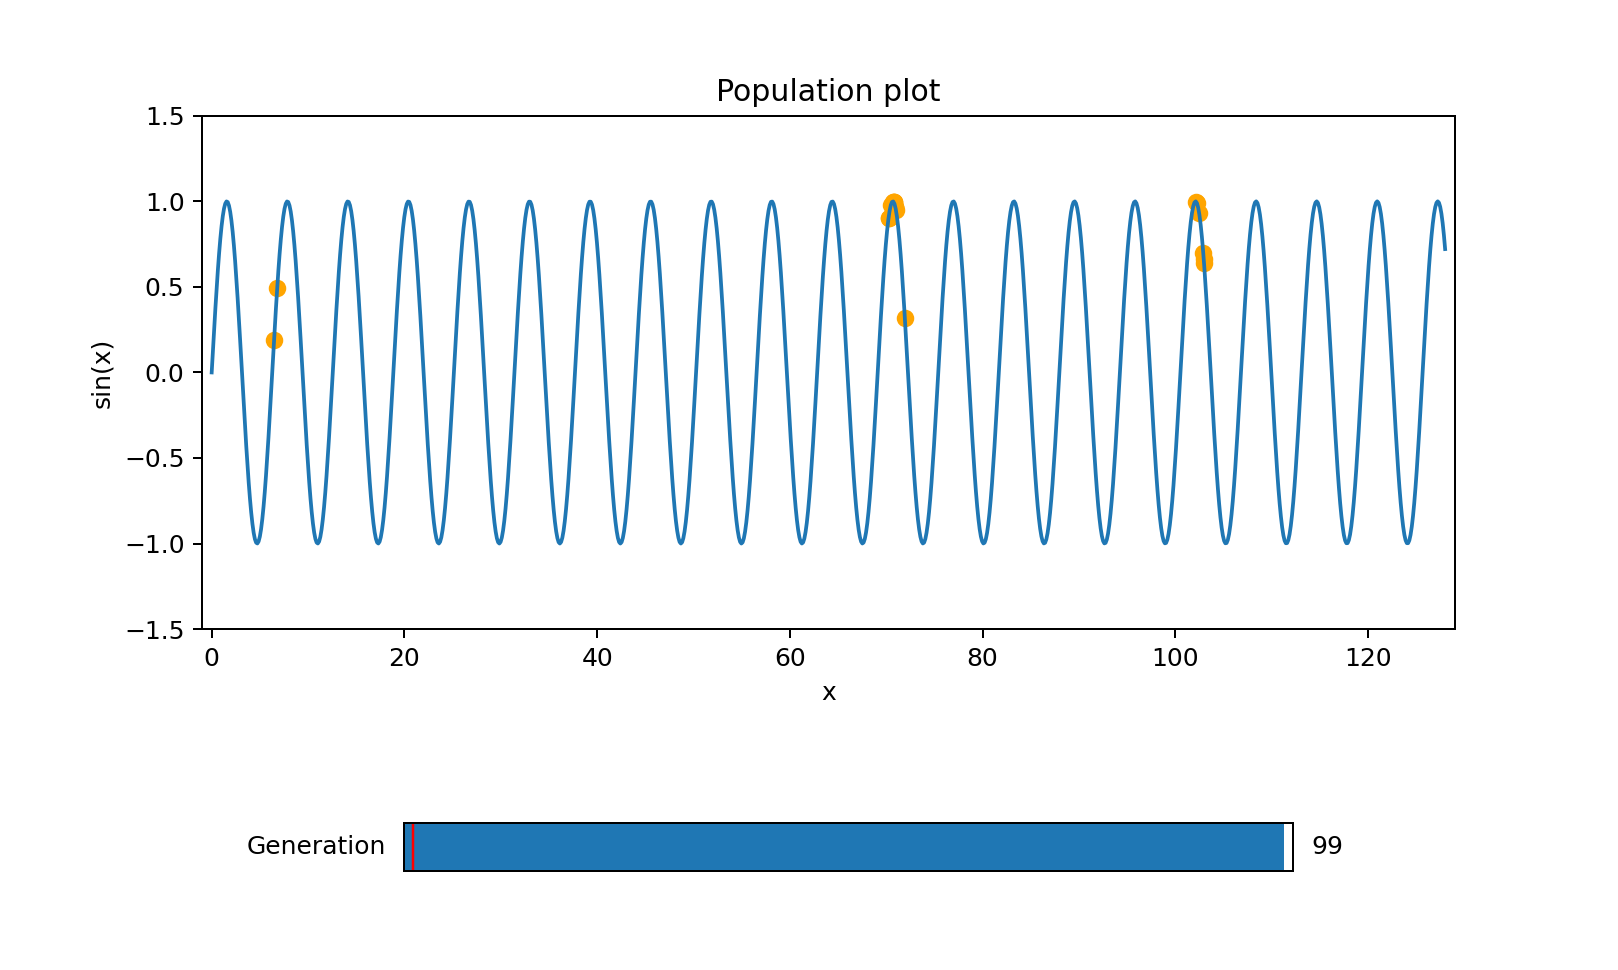

0

In [24]:
# Plot the generations

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = eval_log[i][0]
y = eval_log[i][1]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_2['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[eval_log[gen][0], eval_log[gen][1]])

generation.on_changed(update)


    


## 3: Demo GA - Sine [0, 128] with [5, 10]-constraint

In [20]:
params_3 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 100, 
        'sine_constraint': True     # THIS ONE IS TRUE NOW
    }

algorithm_3 = GA(params_3, fitness=sine_fitness)
eval_log_3 = algorithm_3.run()


Algorithm succsessfully executed


In [25]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log.items():
    if generation % gen_print == 0:
        print('Generation:', generation, '\n')
        print('Population:', data[2], '\n')
        print('Population real value:', data[0], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[1]], '\n\n')

Generation: 0 

Population: ['011000101011110', '111110010111111', '111101100011101', '001011110101101', '110110010111001', '101110101101011', '101011001011100', '000100000010101', '010101001111110', '100010010010100', '000001001011010', '001000101111011', '111101101111001', '011010000000101', '100000111001001', '011010010011110', '101011101101100', '111110100110001', '101101110101000', '000000000011101'] 

Population real value: [4.93671875e+01 1.24746094e+02 1.23113281e+02 2.36757812e+01
 1.08722656e+02 9.34179688e+01 8.63593750e+01 8.08203125e+00
 4.24921875e+01 6.85781250e+01 2.35156250e+00 1.74804688e+01
 1.23472656e+02 5.20195312e+01 6.57851562e+01 5.26171875e+01
 8.74218750e+01 1.25191406e+02 9.16562500e+01 1.13281250e-01] 

Population sine fitness value: ['-0.78', '-0.79', '-0.56', '-0.99', '0.94', '-0.74', '-1.00', '0.97', '-1.00', '-0.51', '0.71', '-0.98', '-0.81', '0.98', '0.19', '0.71', '-0.52', '-0.45', '-0.52', '0.11'] 


Generation: 10 

Population: ['100000001010100', '

<IPython.core.display.Javascript object>


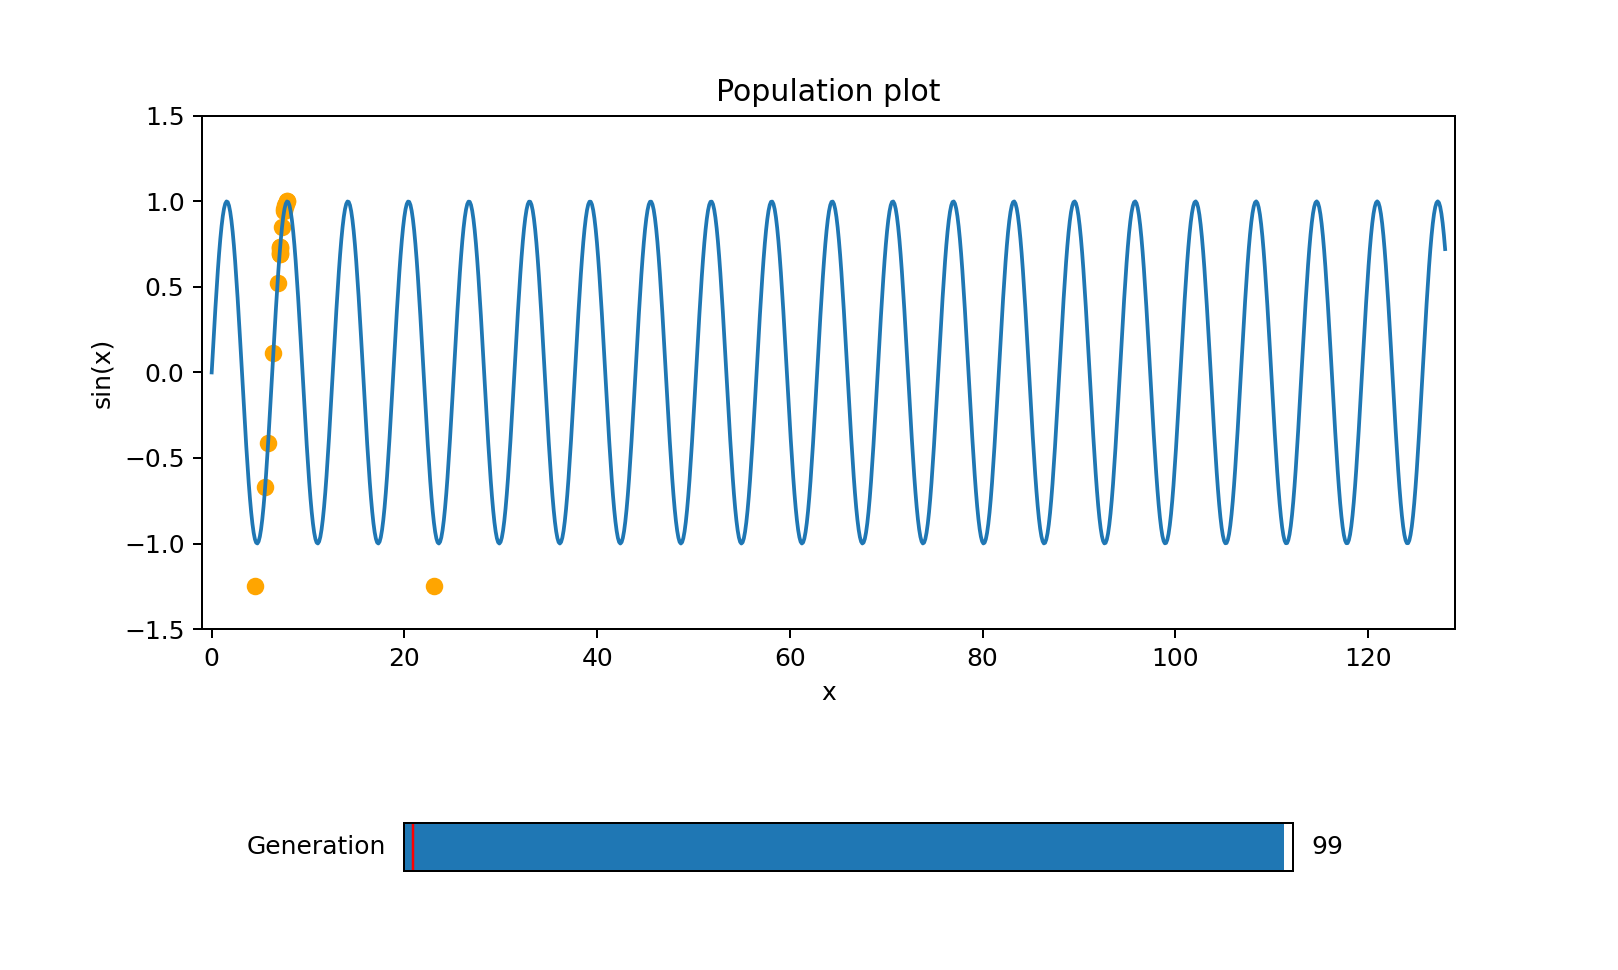

0

In [21]:
# Plot the generations

DATA = eval_log_3

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][0]
y = DATA[i][1]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_3['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][0], DATA[gen][1]])

generation.on_changed(update)
